In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime, timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/energy_task.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19626 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19569 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19654 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19644 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19651 non-null  float64
 15  T7           19681 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19613 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

Переименуем часть столбцов

In [6]:
df = df.rename (
    columns = {
        'Appliances' : 'appliances',
        'Press_mm_hg' : 'press_mm_hg',
        'Windspeed' : 'windspeed',
        'Visibility' : 'visibility',
        'Tdewpoint' : 'tdewpoint'
    }
)

In [7]:
df.columns

Index(['date', 'appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'press_mm_hg', 'RH_out', 'windspeed',
       'visibility', 'tdewpoint'],
      dtype='object')

### Обработка пропущенных знаечний

In [8]:
df.isna().sum()

date           109
appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2           166
T3               0
RH_3             0
T4               0
RH_4            81
T5               0
RH_5            91
T6               0
RH_6            84
T7              54
RH_7             0
T8             122
RH_8             0
T9              84
RH_9             3
T_out          196
press_mm_hg    128
RH_out         101
windspeed        0
visibility      10
tdewpoint        0
dtype: int64

Начнём работу со столбца 'date'. Так как у нас в датасете даны данные с промежутками в 10 минут, то для заполнения элементов данного столбца нам необходимо взять предыдущий элемент столбца и добавить к нему 10 минут.

Для начала приведём столбец к необходимому формату для дальнейшего удобства

In [9]:
df['date'] = pd.to_datetime(df['date'],format = '%d-%m-%Y %H:%M')
df['date']

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

Теперь заполним пропуски

In [10]:
index = df['date'].index[df['date'].apply(np.isnan)]
df['date'] = df['date'].replace('',np.nan).ffill()
index
df.loc[index,'date'] = df.loc[index,'date'] + timedelta(minutes=10)

In [11]:
df['date'].iloc[104]

Timestamp('2016-01-12 10:20:00')

In [12]:
df['date'].unique()

<DatetimeArray>
['2016-01-11 17:00:00', '2016-01-11 17:10:00', '2016-01-11 17:20:00',
 '2016-01-11 17:30:00', '2016-01-11 17:40:00', '2016-01-11 17:50:00',
 '2016-01-11 18:00:00', '2016-01-11 18:10:00', '2016-01-11 18:20:00',
 '2016-01-11 18:30:00',
 ...
 '2016-05-27 16:30:00', '2016-05-27 16:40:00', '2016-05-27 16:50:00',
 '2016-05-27 17:00:00', '2016-05-27 17:10:00', '2016-05-27 17:20:00',
 '2016-05-27 17:30:00', '2016-05-27 17:40:00', '2016-05-27 17:50:00',
 '2016-05-27 18:00:00']
Length: 19735, dtype: datetime64[ns]

In [13]:
df.isna().sum()

date             0
appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2           166
T3               0
RH_3             0
T4               0
RH_4            81
T5               0
RH_5            91
T6               0
RH_6            84
T7              54
RH_7             0
T8             122
RH_8             0
T9              84
RH_9             3
T_out          196
press_mm_hg    128
RH_out         101
windspeed        0
visibility      10
tdewpoint        0
dtype: int64

Остальные значения заменим предыдущими, потому что они обозначают характеристики(температура, влажность, давление, скорость ветра и видимость), которые слабо изменяются за 10 минут

In [14]:
columns_to_replace =['RH_2', 'RH_4',
       'RH_5', 'RH_6',
       'T7', 'T8', 'T9', 'RH_9',
       'T_out', 'press_mm_hg', 'RH_out',
       'visibility']

for row in columns_to_replace:
    df[row] = df[row].replace('',np.nan).ffill()

In [15]:
df.isna().sum()

date           0
appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
press_mm_hg    0
RH_out         0
windspeed      0
visibility     0
tdewpoint      0
dtype: int64

Коррекция типов данных и обогащение данному датасету не требуются

### Удаление дубликатов

In [16]:
df.duplicated().sum()

0

Дубликатов нет

Дублей в датах точно нет, это было проверено выше. Все остальные значения - числовые, а значит и там дублей быть не может

##  Исследование основных параметров(проверка на выбросы)

In [17]:
df.describe()[['appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'press_mm_hg', 'RH_out', 'windspeed',
       'visibility', 'tdewpoint']]

,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420277,22.267611,39.242500,20.855335,39.026888,...,22.029082,42.936165,19.485829,41.552372,7.412433,755.522624,79.750262,4.039752,38.331036,3.760995
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069880,2.006111,3.254576,2.042884,4.341256,...,1.956187,5.224361,2.014734,4.151527,5.318496,7.399399,14.901495,2.451221,11.794255,4.195248


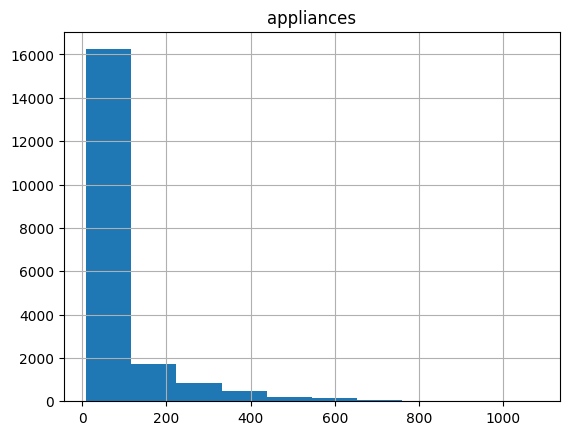

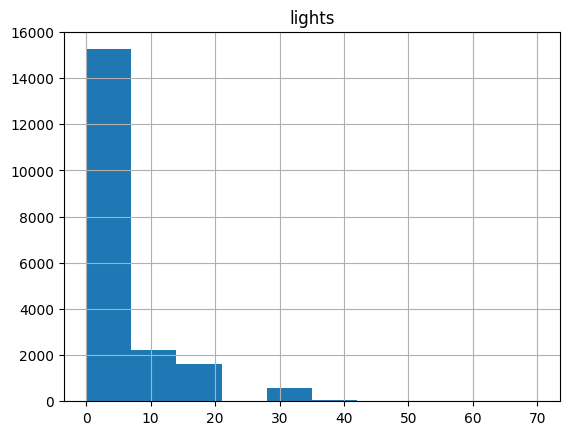

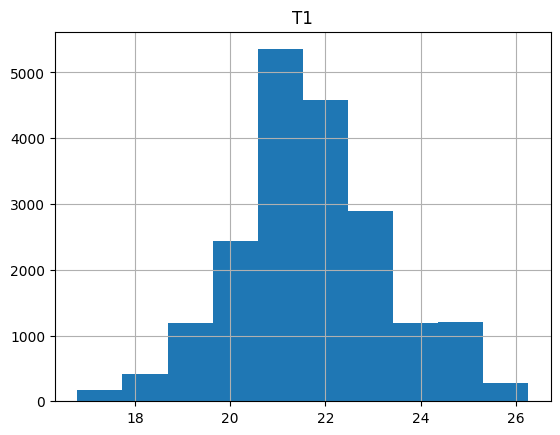

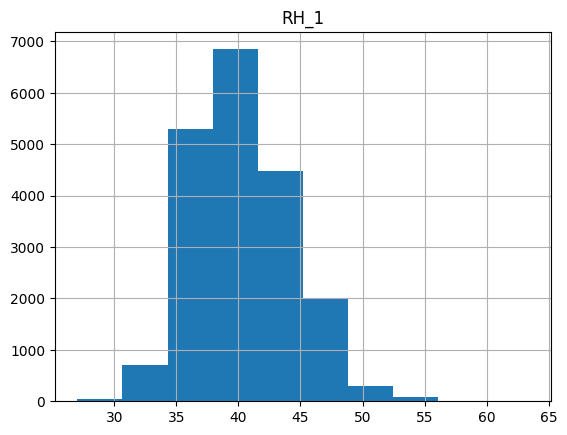

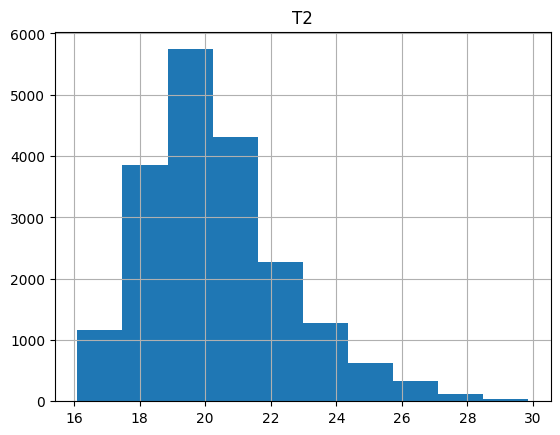

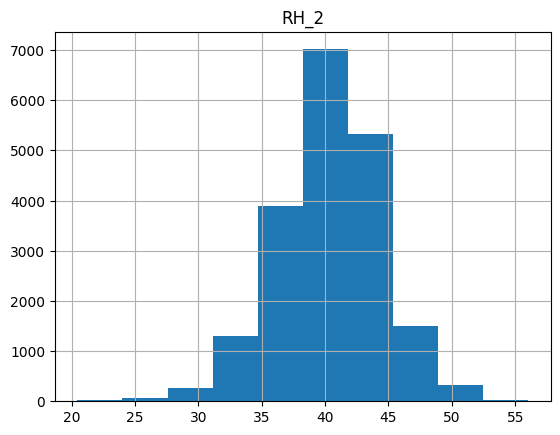

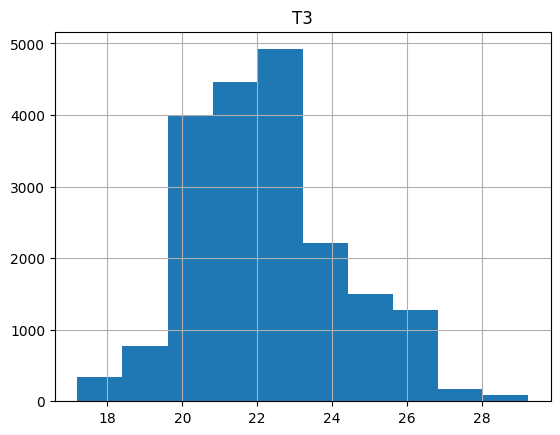

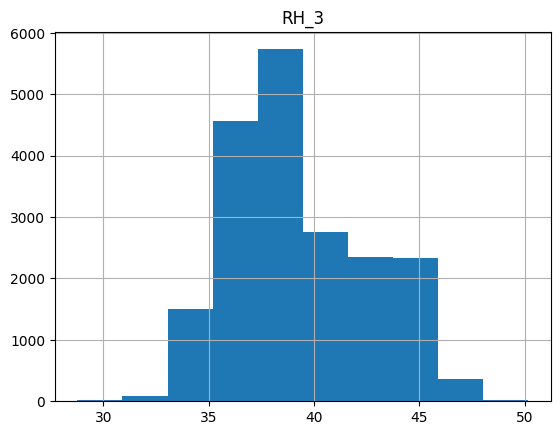

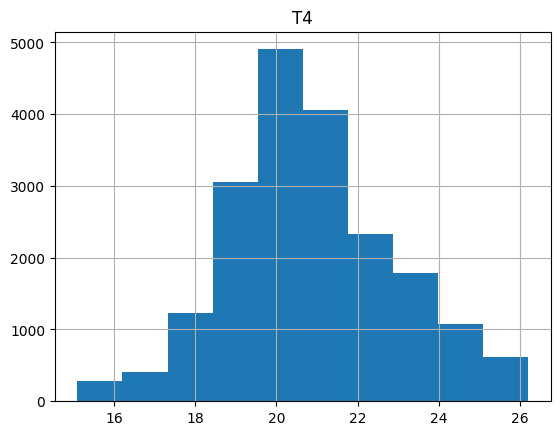

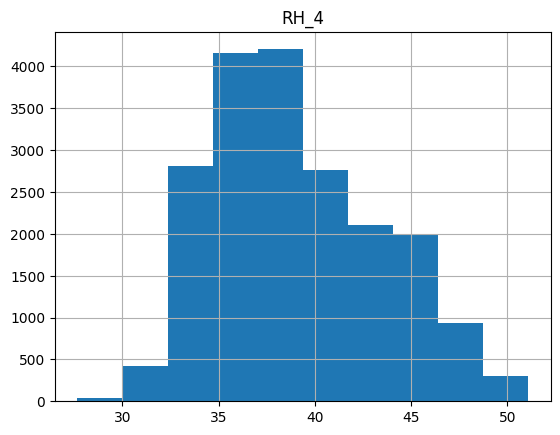

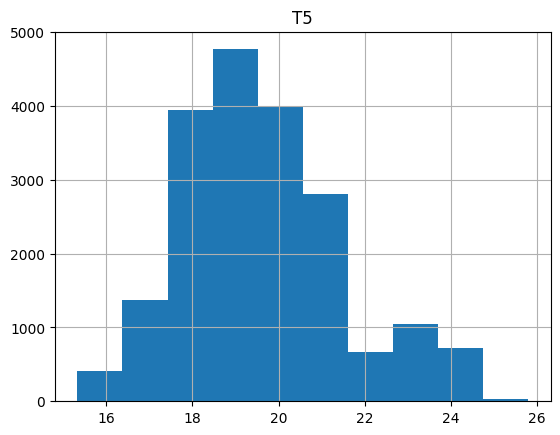

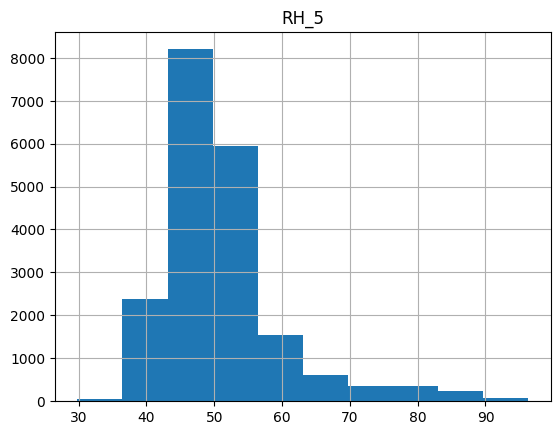

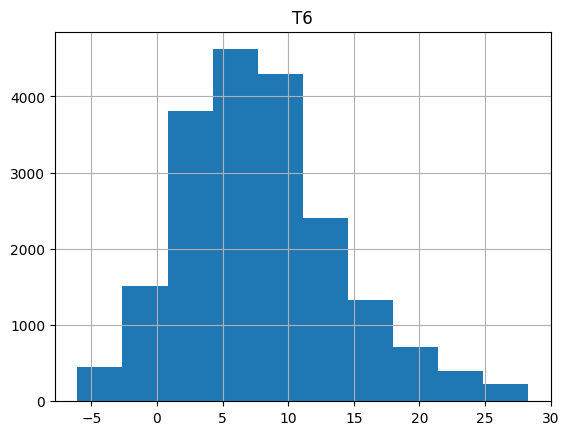

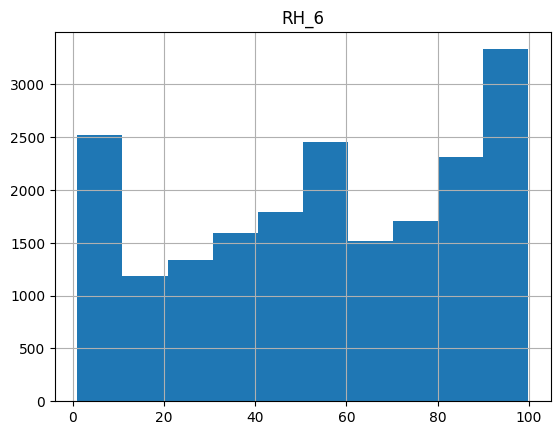

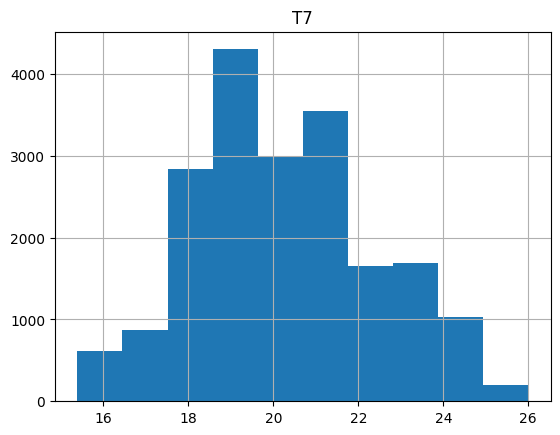

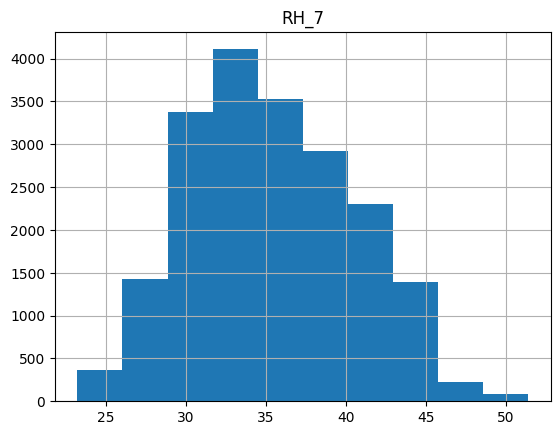

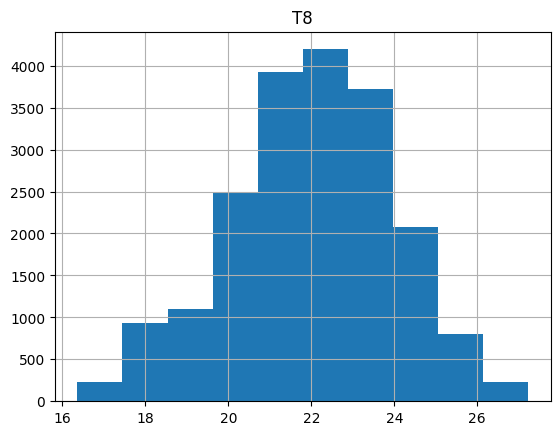

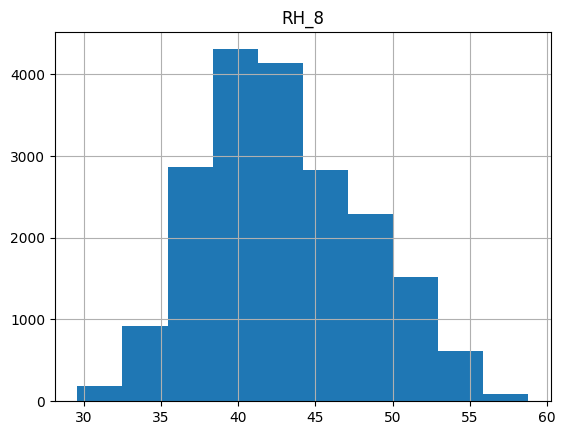

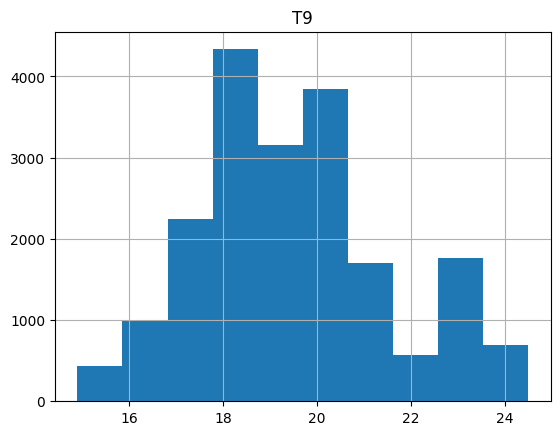

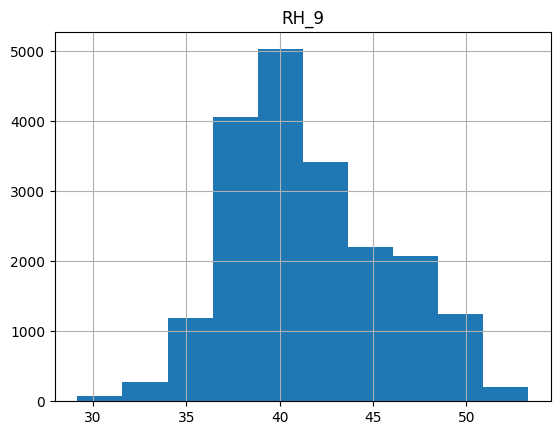

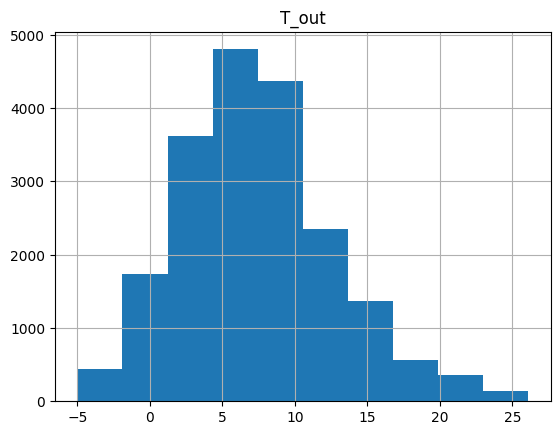

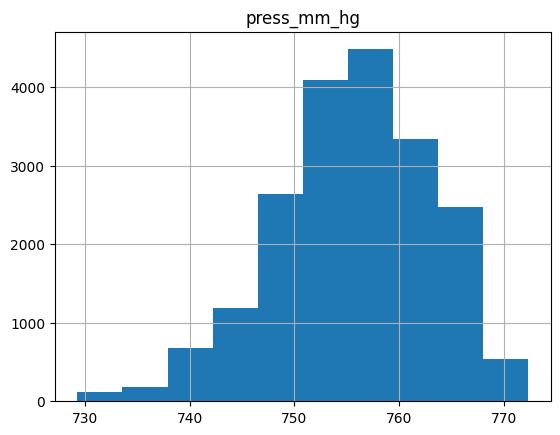

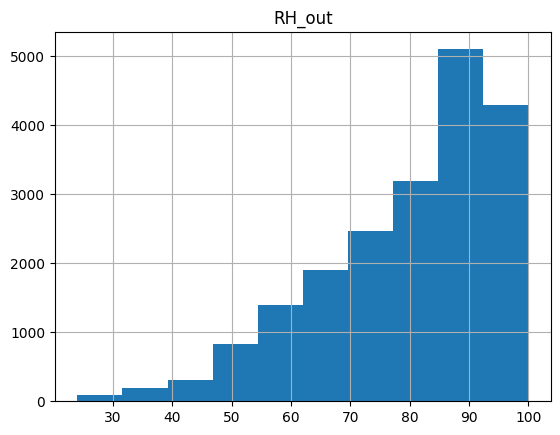

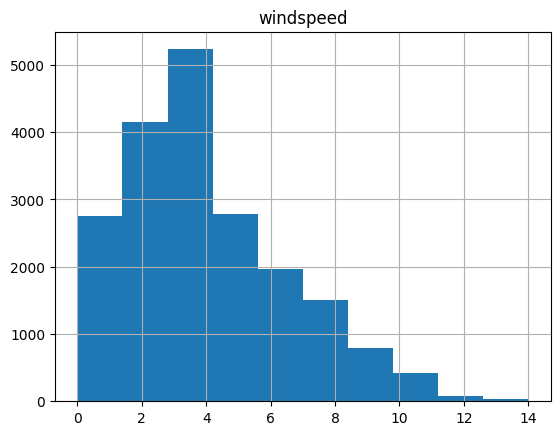

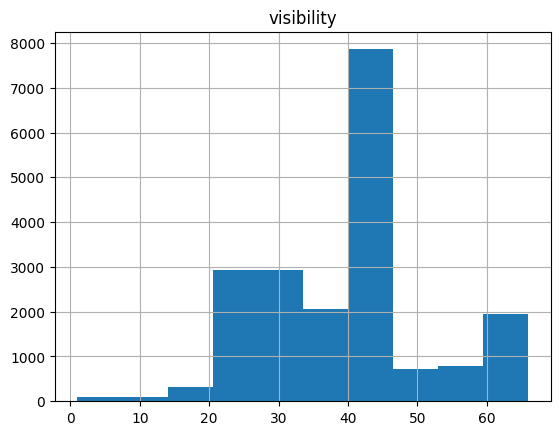

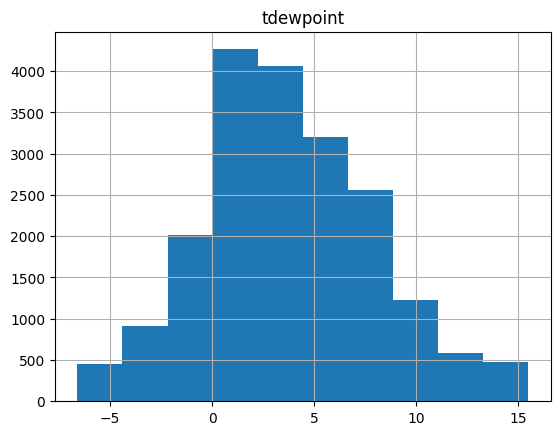

In [18]:
columns = ['appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'press_mm_hg', 'RH_out', 'windspeed',
       'visibility', 'tdewpoint']

for column in columns:
    df.hist(column)

Выбросов не наблюдается, всё в пределах нормы.

### Выделение целевого признака и предикторов

In [19]:
y = df["appliances"]
X = df.drop(["appliances"], axis=1)

In [20]:
y

0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: appliances, Length: 19735, dtype: int64

In [21]:
X

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
0,2016-01-11 17:00:00,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3
19731,2016-05-27 17:30:00,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3
19732,2016-05-27 17:40:00,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3
19733,2016-05-27 17:50:00,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2


Так как все столбцы должны иметь числовой тип, то столбце date придётся удалить

In [22]:
X = X.drop(["date"], axis=1)

### Разделение на обучающую и тестовую выборки

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15788, 25), (15788,), (3947, 25), (3947,))

In [25]:
X_train

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
0,30,19.890000,47.596667,19.200000,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,18.20,48.900000,17.033333,45.530000,6.60,733.500000,92.000000,7.000000,63.000000,5.30
1,30,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.20,48.863333,17.066667,45.560000,6.48,733.600000,92.000000,6.666667,59.166667,5.20
2,30,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,18.20,48.730000,17.000000,45.500000,6.37,733.700000,92.000000,6.333333,55.333333,5.10
3,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,18.10,48.590000,17.000000,45.400000,6.25,733.800000,92.000000,6.000000,51.500000,5.00
4,40,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,18.10,48.590000,17.000000,45.400000,6.13,733.900000,92.000000,5.666667,47.666667,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15783,0,21.290000,37.266667,18.790000,40.400000,22.79,37.200000,19.290000,37.590000,19.100000,...,21.29,44.663333,19.200000,41.526667,5.10,757.850000,96.000000,1.000000,40.000000,4.45
15784,0,21.356667,37.660000,18.890000,40.590000,22.73,36.926667,19.230000,37.723333,19.033333,...,21.29,44.590000,19.200000,41.466667,5.20,757.933333,95.666667,1.000000,40.000000,4.50
15785,0,21.390000,37.950000,18.963333,40.530000,22.60,36.433333,19.290000,38.566667,19.100000,...,21.20,44.430000,19.200000,41.400000,5.30,758.016667,95.333333,1.000000,40.000000,4.55
15786,0,21.390000,38.000000,19.000000,40.290000,22.60,36.560000,19.290000,38.700000,19.166667,...,21.20,44.230000,19.200000,41.163333,5.40,758.100000,95.000000,1.000000,40.000000,4.60


## Простая линейная регрессия

Составим матрицу корреляции, на основе которой сделаем тепловую карту и выберем тот признак, который сильнее всего влияет на столбец "appliances"

In [26]:
corr_matrix = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

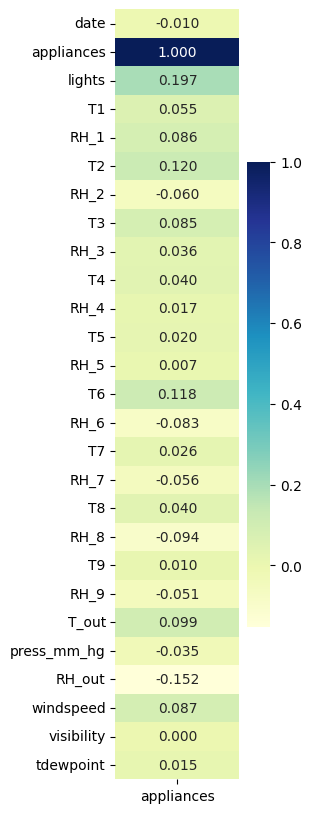

In [27]:
plt.figure(figsize=(2,10))
sns.heatmap(corr_matrix[['appliances']], annot=True, cmap="YlGnBu", fmt=".3f")
plt.show

По тепловой карте видно, что лучше всего для построения модели использовать столбец "lights"

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

In [29]:
simple_lr = LinearRegression().fit(X_train[['lights']], y_train )
y_pred_simple_lr = simple_lr.predict(X_test[['lights']])

In [30]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_lr)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_lr)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_lr))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_lr)}')
print(f'R^2: {r2_score(y_test,y_pred_simple_lr)}')

MAE: 49.16273700923489
MSE: 8357.722024801245
RMSE: 91.42057768796501
MAPE: 0.5094606592707313
R^2: -0.00841071006339722


In [31]:
simple_lr.coef_

array([2.73705889])

### Регуляризация

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [33]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [34]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train[['lights']], y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

In [35]:
parameters = {'alpha': np.arange(0.1, 1, 0.1)}

In [36]:
ridge_optimal = GridSearchCV(Lasso(), parameters).fit(X_train[['lights']], y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

In [37]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [38]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train[['lights']], y_train)
grid_model.best_params_

{'alpha': 10, 'l1_ratio': 0.1}

### Ridge

In [39]:
simple_ridge = Ridge(alpha=0.9).fit(X_train[['lights']], y_train)
y_pred_simple_rid = simple_ridge.predict(X_test[['lights']])

In [40]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_rid)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_rid)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_rid))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_rid)}')
print(f'R^2: {r2_score(y_test,y_pred_simple_rid)}')

MAE: 49.16273847566137
MSE: 8357.721747829068
RMSE: 91.42057617314096
MAPE: 0.5094607194026249
R^2: -0.00841067664499584


In [41]:
simple_ridge.coef_

array([2.73705666])

### Lasso

In [42]:
simple_lasso = Lasso(alpha=0.9).fit(X_train[['lights']], y_train)
y_pred_simple_lasso = simple_lasso.predict(X_test[['lights']])

In [43]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_lasso)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_lasso)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_lasso))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_lasso)}')
print(f'R^2: {r2_score(y_test, y_pred_simple_lasso)}')

MAE: 49.1711957099677
MSE: 8356.130411807817
RMSE: 91.4118723788536
MAPE: 0.5098075144994387
R^2: -0.008218672139177485


In [44]:
simple_lasso.coef_

array([2.72419139])

### ElasticNet

In [45]:
simple_elnet = ElasticNet(alpha=10, l1_ratio=0.1).fit(X_train[['lights']], y_train)
y_pred_simple_elnet = simple_elnet.predict(X_test[['lights']])

In [46]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_simple_elnet)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_simple_elnet)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_simple_elnet))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_simple_elnet)}')
print(f'R^2: {r2_score(y_test, y_pred_simple_elnet)}')

MAE: 49.40344290916517
MSE: 8321.246033017553
RMSE: 91.22086402253353
MAPE: 0.5184080826471441
R^2: -0.004009656682379292


In [47]:
simple_elnet.coef_

array([2.41235239])

### Заключение

Модель, построенная с помощью простой линейной регрессии, является не самой лучшей, так как верное значение она предсказывает лишь в половине случаев. Регуляризация ситуацию не изменила, так как метрики почти не изменились.

## Масштабирование

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(X_train)

StandardScaler()

In [51]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Множественная линейная регрессия

In [52]:
lr = LinearRegression().fit(X_train, y_train)

In [53]:
y_pred = lr.predict(X_test)

In [54]:
y_pred

array([ 79.25983809,  81.66358021,  84.18232719, ..., 129.02299664,
       118.52836494, 102.64649955])

In [55]:
 y_test

15788    370
15789    590
15790    320
15791    310
15792    260
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: appliances, Length: 3947, dtype: int64

In [56]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test,y_pred)}')

MAE: 52.05410291048359
MSE: 7524.401635600519
RMSE: 86.74330888086135
MAPE: 0.5976598878114914
R^2: 0.09213453454877862


In [57]:
lr.coef_

array([ 17.89653526,  -7.72218866,  46.20055559, -20.04614743,
       -42.15537007,  41.5252016 ,  27.66344517,  -5.73701768,
       -10.47640365,  -2.17689209,   0.98483243,  35.67292675,
         9.53237935,   1.6537383 ,  -2.45368614,  15.35184186,
       -31.18451864, -20.38647459,  -4.06973209, -34.70878883,
         1.741331  ,  -6.23213925,   3.2576807 ,   2.34888221,
        12.27643091])

### Регулярицзация

Выполним поиск по сетке

In [58]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [59]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

In [60]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [61]:
ridge_optimal = GridSearchCV(Lasso(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

In [62]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [63]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train, y_train)
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

### Ridge

In [64]:
ridge = Ridge(alpha=0.9).fit(X_train, y_train)
y_pred_rid = ridge.predict(X_test)

In [65]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_rid)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rid)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_rid))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_rid)}')
print(f'R^2: {r2_score(y_test,y_pred_rid)}')

MAE: 52.06409945216181
MSE: 7525.571405020839
RMSE: 86.75005132575335
MAPE: 0.5978362201804417
R^2: 0.09199339465345135


In [66]:
ridge.coef_

array([ 17.89995667,  -7.76357011,  46.14212934, -19.95333933,
       -42.05345988,  41.51904743,  27.61954159,  -5.74273881,
       -10.47345317,  -2.19838955,   0.98901185,  35.54793365,
         9.51995178,   1.62671537,  -2.45252734,  15.34986025,
       -31.18337262, -20.36280876,  -4.0719196 , -34.00918597,
         1.73829729,  -5.87074467,   3.26501577,   2.3455339 ,
        11.7410563 ])

### Lasso

In [67]:
lasso = Lasso(alpha=0.9).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [68]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_lasso))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_lasso)}')
print(f'R^2: {r2_score(y_test,y_pred_lasso)}')

MAE: 52.379694340997126
MSE: 7527.037271920794
RMSE: 86.75849970994655
MAPE: 0.6092115805696089
R^2: 0.0918165287709709


In [69]:
lasso.coef_

array([ 18.34080231, -11.28668507,  32.12111812,  -0.        ,
       -22.453588  ,  33.00598629,  11.74378735,  -5.12428848,
        -0.44856156,  -5.89042573,   0.        ,   3.01140795,
         0.        ,  -0.        ,  -3.50991552,   7.40345453,
       -26.9306592 , -13.76709004,  -1.47182622,  -0.        ,
        -0.        ,  -0.        ,   1.94336475,   1.32684345,
        -0.        ])

### ElasticNet

In [70]:
elnet = ElasticNet(alpha=1, l1_ratio=0.75).fit(X_train, y_train)
y_pred_elnet = elnet.predict(X_test)

In [71]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_elnet)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_elnet)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_elnet))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_elnet)}')
print(f'R^2: {r2_score(y_test, y_pred_elnet)}')

MAE: 54.361928141225505
MSE: 7658.231160504052
RMSE: 87.5113201848998
MAPE: 0.6425956128727895
R^2: 0.07598717695122459


In [72]:
elnet.coef_

array([ 15.93996467,  -1.12696816,  13.71212536,   3.79900612,
        -5.3111334 ,  12.69617448,   7.20847236,  -2.72896984,
        -0.        ,  -4.54844233,   0.        ,   3.63091318,
         0.        ,  -0.        ,  -5.98878024,   1.18391414,
       -11.85910703,  -4.72886877,  -3.35249906,   0.        ,
        -1.23150629,  -4.7881528 ,   2.00236041,   0.58857182,
        -0.86348814])

### Заключение

Данная модель получилась очень хорошей. Метрики показывают, что результат предсказывается идеально. Использование регуляризаций L1, L2 и ElasticNet ситуацию почти не изменило, модель лишь слегка ухудшилась, но в случае с L2 данное ухудшение почти незаметно.

### Полиномиальная регрессия с использованием пайплайна

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [74]:
Input = [('standardscaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression()) ]

In [75]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [76]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [77]:
y_pred_pol = pipe.predict(X_test)
y_pred_pol

array([144.2739283 , 137.8748041 , 131.53102382, ..., 265.41535586,
       246.97427158, 189.08605115])

In [78]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_pol)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_pol)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_pol))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_pol)}')
print(f'R^2: {r2_score(y_test, y_pred_pol)}')

MAE: 89.58943810876197
MSE: 16269.872794000757
RMSE: 127.55341153415206
MAPE: 1.128093490223659
R^2: -0.9630604999966628


### Регуляризация

### Ridge

In [79]:
Input = [('standardscaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', Ridge(alpha=0.9))]

In [80]:
pipe_rid = Pipeline(Input)

In [81]:
pipe_rid.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=0.9))])

In [82]:
y_pred_pol_rid = pipe_rid.predict(X_test)
y_pred_pol_rid

array([145.09246096, 140.07131403, 135.533303  , ..., 241.77315112,
       216.55586936, 154.15804709])

In [83]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_pol_rid)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_pol_rid)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_pol_rid))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_pol_rid)}')
print(f'R^2: {r2_score(y_test, y_pred_pol_rid)}')

MAE: 87.16008332960796
MSE: 15770.71588901215
RMSE: 125.58151093617305
MAPE: 1.0888099389196446
R^2: -0.902834140768763


### Lasso

In [84]:
Input = [('standardscaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', Lasso(alpha=0.9))]

In [85]:
pipe_lasso = Pipeline(Input)

In [86]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Lasso(alpha=0.9))])

In [87]:
y_pred_pol_lasso = pipe_lasso.predict(X_test)
y_pred_pol_lasso

array([ 89.34564095,  91.01610831,  93.34922299, ..., 170.43644739,
       151.72353994, 131.30399346])

In [88]:
y_test

15788    370
15789    590
15790    320
15791    310
15792    260
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: appliances, Length: 3947, dtype: int64

In [89]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_pol_lasso)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_pol_lasso)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_pol_lasso))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_pol_lasso)}')
print(f'R^2: {r2_score(y_test, y_pred_pol_lasso)}')

MAE: 53.39151101110479
MSE: 7898.413162901074
RMSE: 88.87301706874294
MAPE: 0.6108992468783137
R^2: 0.047007736995827276
